# Harnessing AI to annotate the severity of all phenotypic abnormalities

within the Human Phenotype Ontology

Kitty B Murphy (Department of Brain Sciences, Imperial College London, UK, UK Dementia Research Institute at Imperial College London, UK)  
Brian M Schilder (Department of Brain Sciences, Imperial College London, UK, UK Dementia Research Institute at Imperial College London, UK)  
Nathan G Skene (Department of Brain Sciences, Imperial College London, UK, UK Dementia Research Institute at Imperial College London, UK)

In [ ]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

## Abstract

The Human phenotype Ontology (HPO) has played a crucial role in defining, diagnosing, prognosing, and treating human diseases by providing a standardised database for phenotypic abnormalities. However, there is currently no information pertaining to the severity of each phenotype, making systematic analyses and prioritisation of results difficult. With 18,082 abnormalities now corresponding to over 10,000 rare diseases, manual curation of such phenotypic annotations by experts would be labor-intensive and time-consuming. Leveraging advances in artificial intelligence, we employed the OpenAI GPT-4 model with Python to systematically annotate the severity of ~ 17,000 phenotypic abnormalities in the HPO. By checking that phenotypes with guaranteed outcomes were appropriately annotated, we demonstrate the potential for natural language processing technologies to automate the curation process accurately. For example, phenotypes such as “decreased male fertility” were used to compute a true positive rate, as they would be expected to be annotated as often, if not always, causing reduced fertility. Across the annotated outcomes, we observed \> 73 % annotation accuracy. Using a novel approach, we developed a severity scoring system that incorporates both the nature of the phenotype outcome and the frequency of its occurrence. These severity metrics will enable efforts to systematically prioritise which human phenotypes are most detrimental to human well being, and best targets for therapeutic intervention.

## Introduction

Comprehensive annotation of phenotypic abnormalities is invaluable for defining, diagnosing, prognosing, and treating human disease. Since 2008, the Human phenotype Ontology (HPO) has been instrumental to this, by providing a standardised database for the description and analysis of human phenotypes @Gargano2024-nj. Through developing open community resources, the depth and breadth of the HPO has continued to expand and there are now ~ 18,000 phenotypic abnormalities, corresponding to \> 10,000 rare diseases, described. In recent years, the HPO has expanded its disease annotations so that each HPO term can have metadata including typical age of onset and frequency. In addition, there are the Clinical modifier (put this in italics) and Clinical course (also italics) subontologies, which contains terms to describe factors including severity and triggers, and mortality and progression, respectively. Describing the severity-related attributes of a disease is crucial for attaining significant objectives in rare diseases. This includes enhancing diagnostic capabilities, as well as prioritising and guiding gene therapy trials.

To date, the HPO has largely been manually curated by experts including clinicians, clinical geneticists, and researchers. Although this approach ensures the quality and accuracy of the ontology, it is time-consuming and labour-intensive. As a result, less than 1% of terms within the HPO have metadata pertaining to their features such as time course and severity. As artificial intelligence (AI) capabilities advance, there is an opportunity to integrate natural language processing technologies into assisting in the curation process. Here, we have used the OpenAI GPT-4 model (https://openai.com/) with Python to systematically annotate the severity of \> 17,000 phenotypic abnormalities within the HPO. Our severity annotation framework was developed based on previously defined criteria developed through consultation with clinicians 2. The authors consulted 192 healthcare professionals for their opinions on the relative severity of various clinical characteristics: they used this to create a system for categorising the severity of diseases. Briefly, each healthcare professional was sent a survey asking them to first rate how important a disease characteristic was for determining disease severity, and then to rate the severity of a set of given disease. Using the responses, the authors were able to categorise clinical characteristics into 4 ‘severity tiers’. While characteristics such as shortened lifespan in infancy and intellectual disability were identified as highly severe and placed into tier 1, sensory impairment and reduced lifespan were categorised as less severe and placed into tier 4. Being able to quickly ascribe severity measures based on those criteria to HPO phenotypes, will assist with interpreting phenome-wide studies.

Almost 800 phenotypes were annotated twice to evaluate annotation consistency, and a true positive rate of annotations was calculated to assess annotation accuracy. Additionally, based on the clinical characteristics and their occurrence, we have quantified the severity of each phenotype, providing an example of how these clinical characteristic annotations can be used to guide prioritisation of gene therapy trials. Ultimately, we hope that our resource will be of utility to those working in rare diseases, as well as the wider rare disease community.

## Results

### Annotating the HPO using OpenAI GPT-4

We employed the OpenAI GPT-4 model with Python to annotate 16,982 terms within the Human phenotype Ontology (HPO). Our annotation framework was developed based on previously defined criteria for classifying disease severity @Lazarin2014-rz. We sought to evaluate the impact of phenotypes on outcomes including intellectual disability, death, impaired mobility, physical malformations, blindness, sensory impairments, immunodeficiency, cancer, reduced fertility, and congenital onset. Through prompt design we found that the performance of GPT-4 improved when we incorporated a scale associated with each effect and required a justification for each response. For each effect, we asked about the likelihood of its occurrence - whether it never, rarely, often, or always occurred. Furthermore, our prompt design revealed that the optimal trade-off between the number of phenotypes and performance was achieved when inputting no more than two or three phenotypes per prompt. An example prompt can be seen in Figure 1. The phenotype outcome occurrence varied by category. While \> 50% of annotated phenotypes never caused blindness, cancer, immunodeficiency, intellectual disability, reduced fertility, and sensory impairment, a similar proportion often or always had congenital onset (Fig. 1).

Translating ontology terms to ids.

Reading cached RDS file: phenotype_to_genes.txt

+ Version: 

208 phenotypes do not have matching HPO IDs.

Reading in GPT annotations for 16,925 phenotypes.

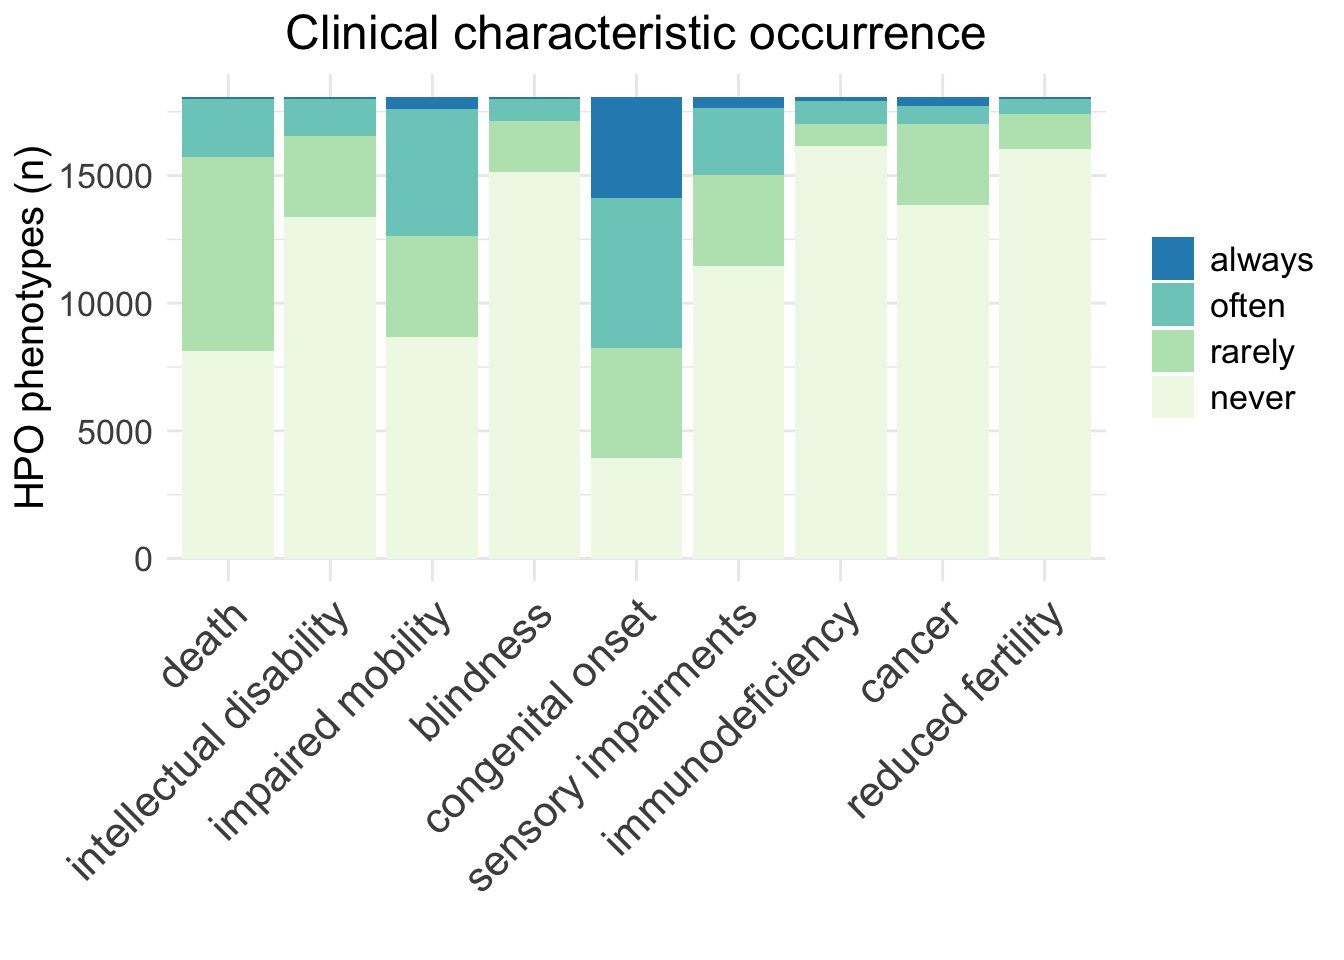

In [ ]:
# read in hpo gpt annotations 
hpo_annot <- HPOExplorer::gpt_annot_read()

![Figure 1: GPT-4 was able to annotate all human phenotypes based on whether they are always/often/rarely/never associated with different clinical characteristics. a An example of the prompt input given to to GPT-4. The phenotypes listed in the last sentence were changed to allow ~17,000 phenotypes to be annotated. b Stacked bar plot showing the proportion of the occurrence of each clinical characteristic across all ~17,000 phenotypes annotated.The terms shown on the X-axis are the clinical characteristics, for which GPT-4 was asked to determine whether each phenotype caused them. For example, it annotated ‘Respiratory arrest’ as always causing death. Only 75 phenotypes were annotated as always causing death, despite 9,544 phenotypes often or rarely causing it.](attachment:figures/clinical_characteristic_occurrence.png) \### Annotation consistency and accuracy To assess annotation consistency, 793 phenotypes underwent duplicate annotations, with two metrics employed to determine the ‘consistency rate’. The first, less stringent metric, defined consistency as the duplicate annotations being either ‘always’ and ‘often’, or ‘never’ and ‘rarely’. The second, more stringent metric, required exact agreement in annotation occurrences, e.g. ‘always’ and ‘always’. For the less stringent metric, duplicated phenotypes were annotated consistently at a rate of at least 80%, and for the more stringent metric, the lowest consistency rate was 57%, for congenital onset. An example of where annotations were inconsistent was for the HPO term ‘Acute leukaemia’. One time, GPT-4 annotated it as often causing impaired mobility, giving the justification that ‘weakness and fatigue from leukaemia and its treatment can impair mobility’. The other time, GPT-4 annotated it as rarely causing impaired mobility, giving the justification that ‘acute leukaemia rarely impairs mobility directly’. Despite specifying in the prompt for GPT-4 not to take into consideration indirect effects, here is an example of where it failed to do so.
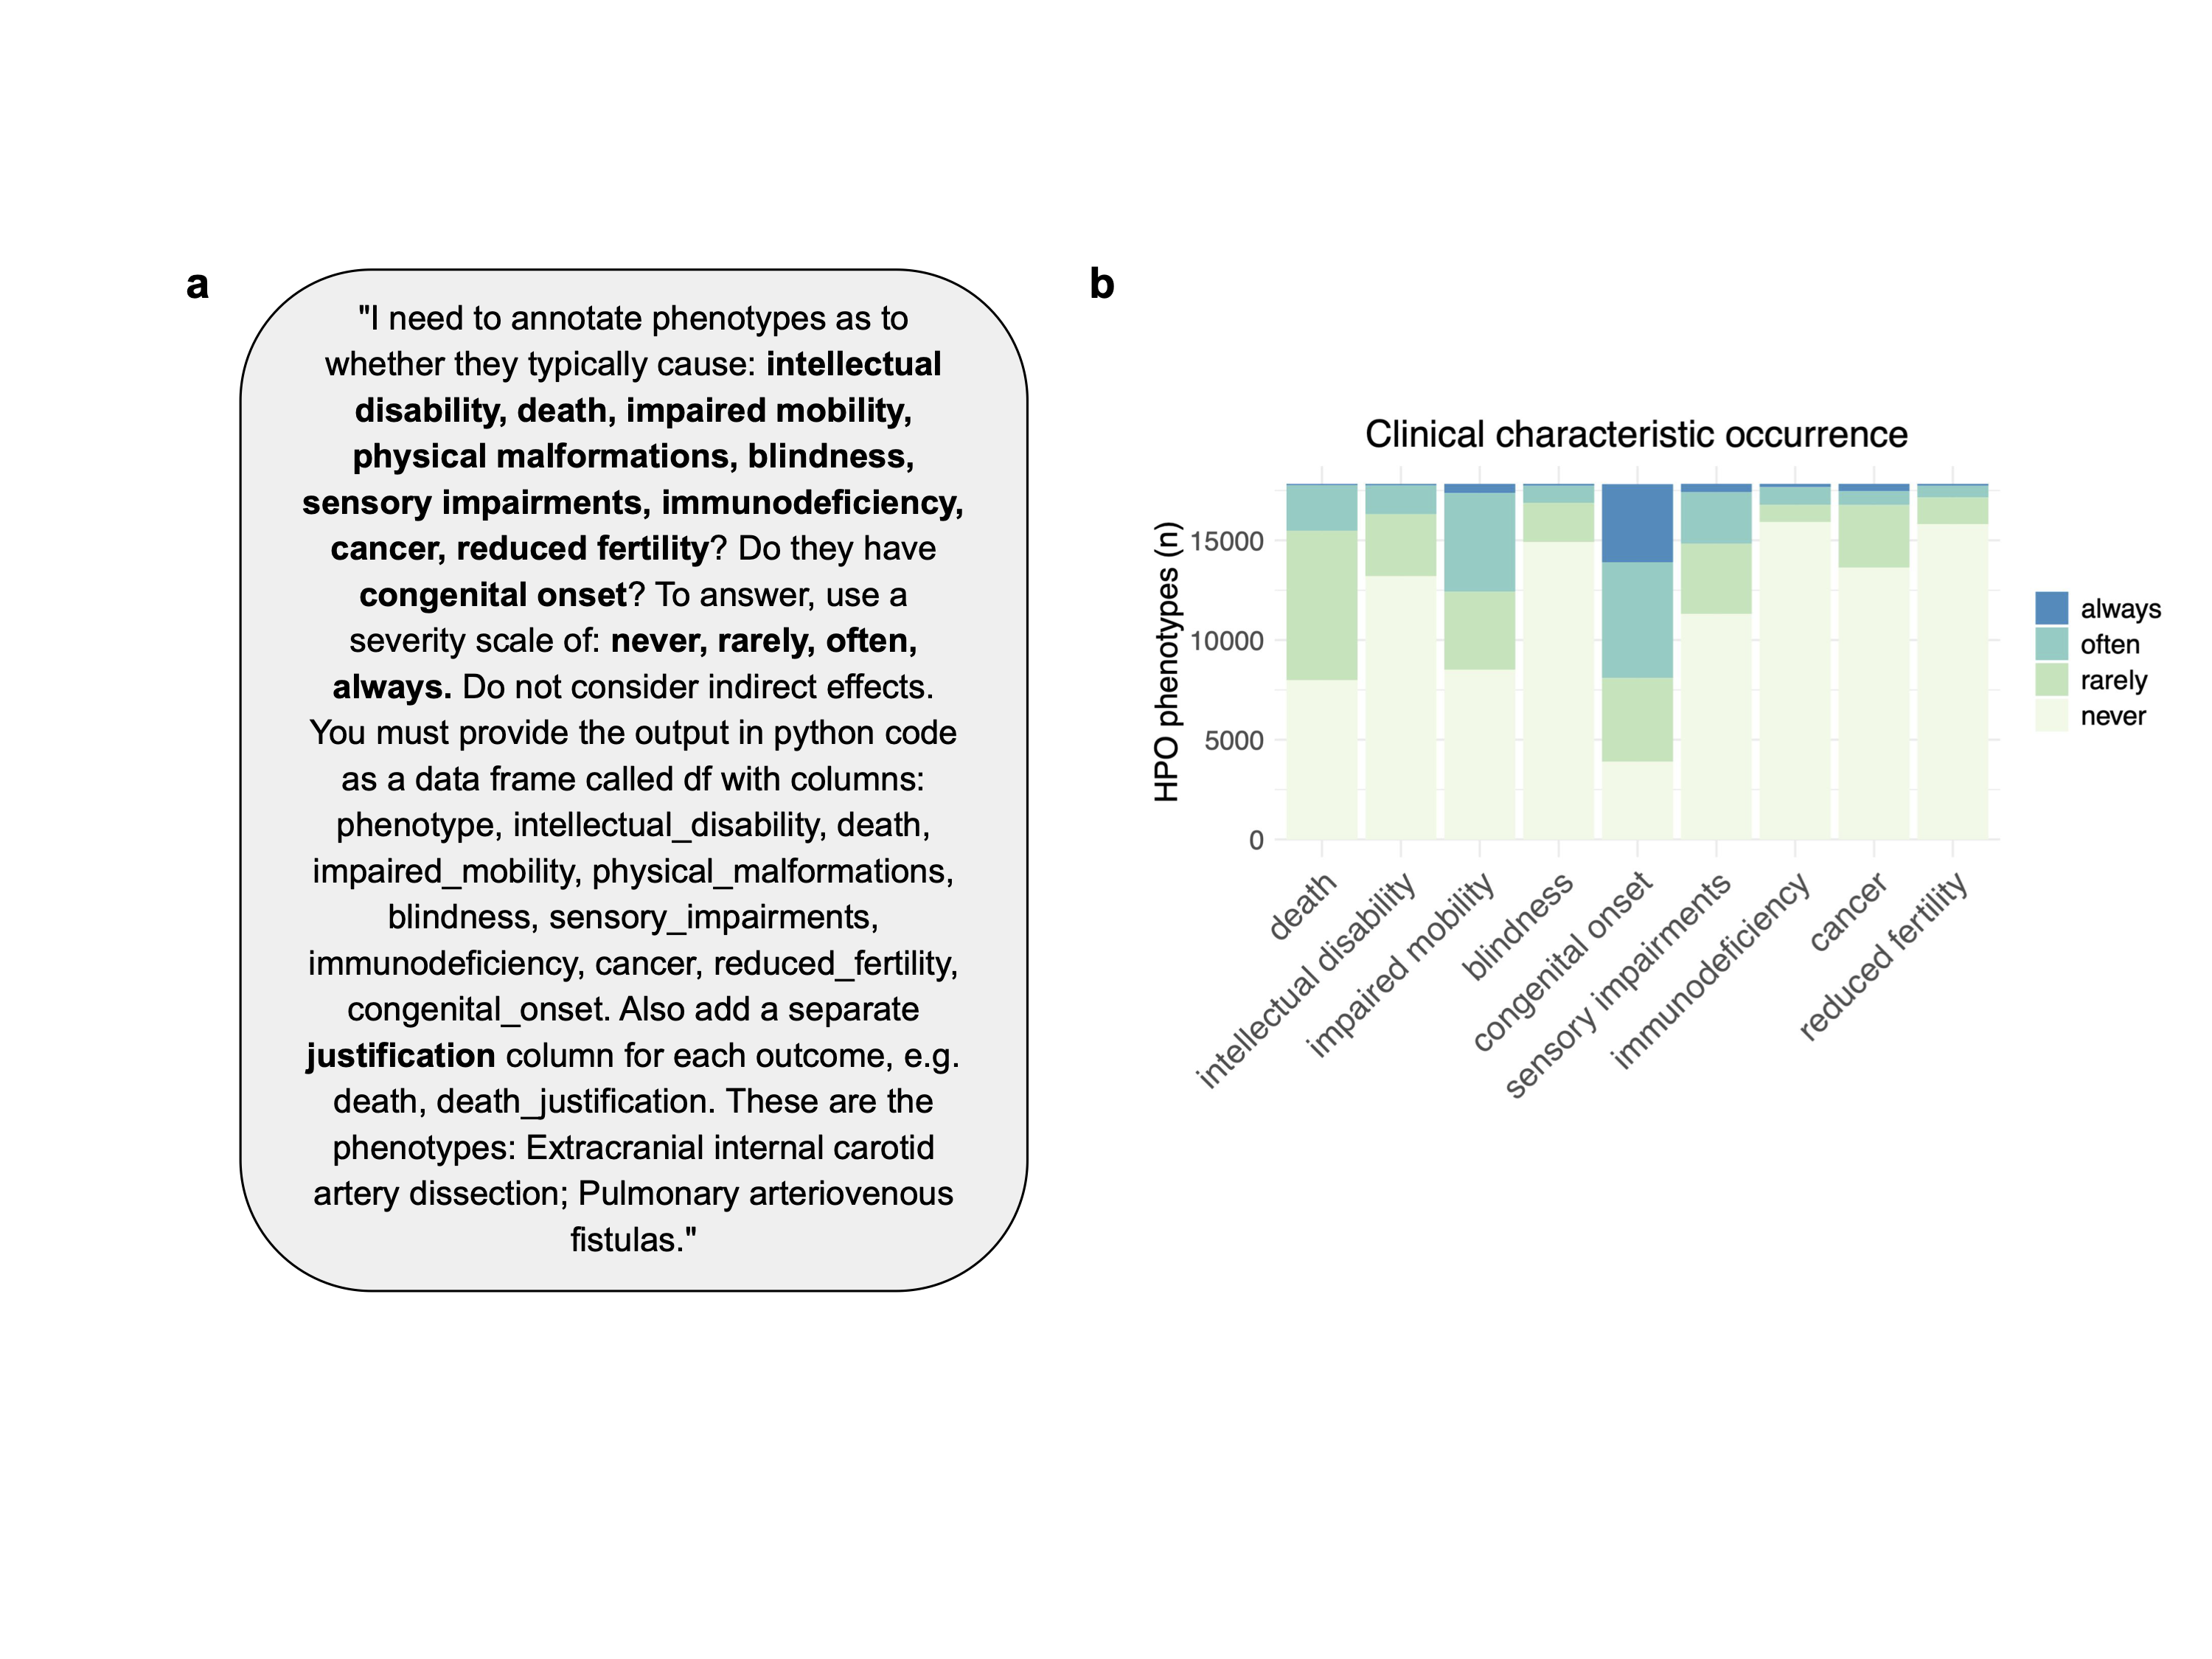

In [ ]:
# Annotation checks
checks <- HPOExplorer::gpt_annot_check()

Translating ontology terms to ids.

Reading cached RDS file: phenotype_to_genes.txt

+ Version: 

208 phenotypes do not have matching HPO IDs.

Reading in GPT annotations for 16,925 phenotypes.

Number of phenotype hits per query group:

 - intellectual_disability: 6
 - impaired_mobility: 293
 - physical_malformations: 78
 - blindness: 1
 - sensory_impairments: 252
 - immunodeficiency: 5
 - cancer: 697
 - reduced_fertility: 5

ℹ Please use the `rows` argument instead.
ℹ The deprecated feature was likely used in the HPOExplorer package.
  Please report the issue at
  <https://github.com/neurogenomics/HPOExplorer/issues>.

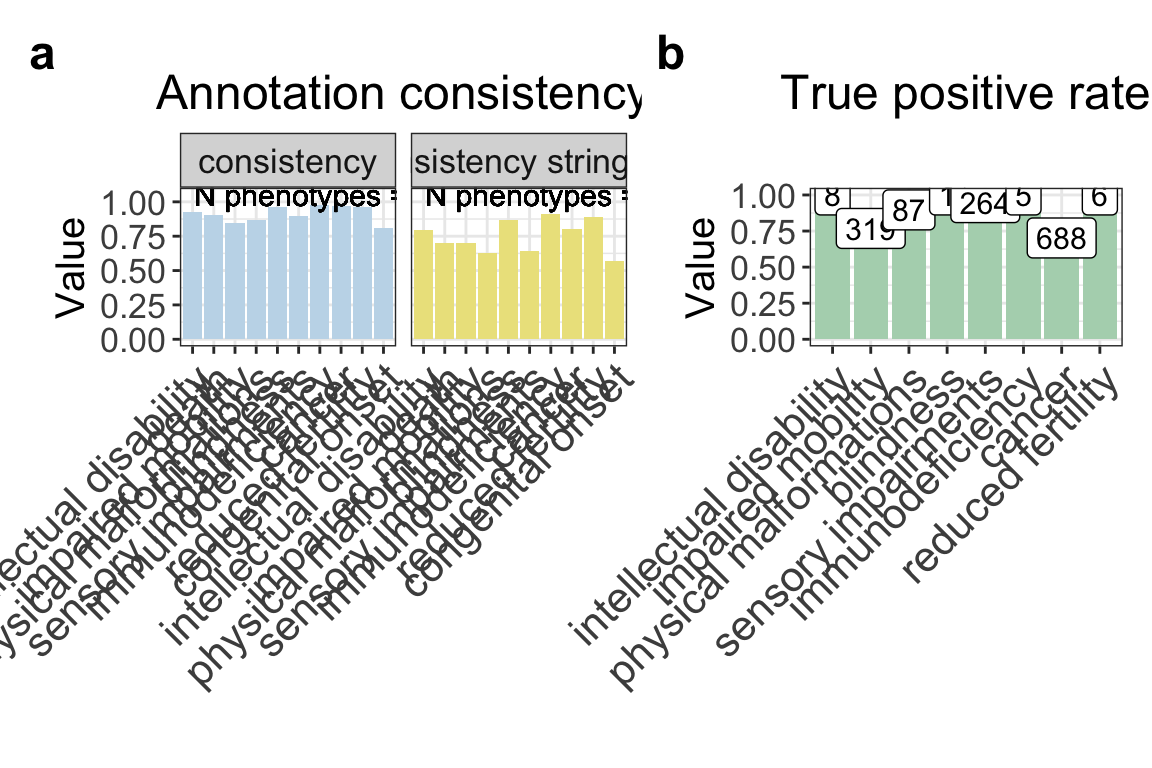

In [ ]:
consistency_plot <- ggplot(check_df[metric_type %in% metric_types & metric_category %in% metric_categories, ],
                           aes(x = annotation, y = value,
                               fill = metric_category,
                               label = round(value, 2))) +
  geom_bar(stat = "identity", show.legend = TRUE) +
  facet_grid(facets = ~metric_category, scales = "free") +
  theme_bw() +
  labs(x = "", y = "Value") +
  ggtitle("Annotation consistency") +
  scale_fill_manual(values = c("#C3DAEAFF", "#ECE28BFF")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
        legend.position = "none",
        text = element_text(size = 16),
        title = element_text(size = 15),
        plot.title = element_text(hjust = 0.5)) +
  geom_text(aes(x = 7.5, y = 1.05, label = "N phenotypes = 793"), size = 4)


metric_categories <- "true pos"

accuracy_plot <- ggplot(check_df[metric_type %in% metric_types & metric_category %in% metric_categories, ],
                        aes(x = annotation, y = value,
                            fill = metric_category,
                            label = n)) +
  geom_bar(stat = "identity", show.legend = TRUE) +
  theme_bw() +
  labs(x = "", y = "Value") +
  ggtitle("True positive rate") +
  scale_fill_manual(values = c("#B1D5BBFF")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
        legend.position = "none",
        text = element_text(size = 16),
        title = element_text(size = 15),
        plot.title = element_text(hjust = 0.5)) +
  geom_label(fill = "white", size = 4)

consistency_plot + accuracy_plot + plot_layout(widths = c(1, 0.7)) +
  plot_annotation(tag_levels = 'a') & theme(plot.tag = element_text(size = 18, face = "bold"))

In order to evaluate the accuracy of the annotations, we calculated a true positive rate. This involved identifying specific branches within the HPO that would contain phenotypes that would reliably indicate the presence of certain conditions. For instance, the phenotypes ‘decreased fertility in females’ and ‘decreased fertility in males’ should, in the annotations, often, if not always, cause reduced fertility. We observed an encouraging true positive rate exceeding 70% across all phenotype outcomes. The lowest rate was observed for cancer (73%), for which all descendants of the HPO term ‘Neoplasm’ were considered to be true positives. However, this assumption, as GPT-4 detects, is not always true as these abnormal tissue/cell growths can be either cancerous or benign. For example, the HPO term ‘multiple digital exostoses’, which are benign bone tumours, is a descendant of the HPO term ‘Neoplasm’, and GPT-4 annotated it as rarely causing cancer, giving the justification that ‘Bone growths may rarely become cancerous’. This high level of accuracy underscores the robustness of our annotations and the reliability of the HPO framework in capturing clinically relevant phenotypic information. However, we acknowledge that the number of testable phenotypes for some of these categories are low. Furthermore, some of the ‘true positive’ phenotypes are synonymous to the clinical characteristic itself, for instance, for testing the true positive rate of the characteristic ‘Intellectual disability’, the phenotype ‘Severe intellectual disability’ was used.

### Quantifying phenotypic severity

Quantifying the severity of phenotypes can have important implications for diagnosis, prognosis, and treatment, for instance, guiding prioritisation of gene therapy trials for the most severe phenotypes. First, we created a dictionary to map each phenotype outcome (e.g. blindness) and its response (always, often, rarely, never) to numeric values from 0-4. Then, the phenotype outcome values were multiplied by their associated response values. Importantly, the values reflected the severity of each outcome based on both the outcome itself and the frequency of the response. For instance, a phenotype always causing death would have a higher multiplied value than a phenotype rarely causing reduced fertility. Next, we computed an average score for each phenotype by aggregating the multiplied values across all phenotype outcomes and then calculating the mean. This was then normalised by the theoretical maximum severity score, so that all phenotypes were on a 0-100 severity scale (where 100 is the most severe phenotype possible). This average normalised score represents the overall severity of the phenotype based on the severity of its individual outcomes.

Based on these scores we evaluated the top 50 severe phenotypes. The most severe phenotype, with a score of 58, was ‘Anencephaly’ (HP:0002323). Anencephaly is a birth defect where the baby is born without a portion of its brain and skull, often these babies are stillborn. In fact, many of the most severe phenotypes were related to developmental brain and neural tube defects. Comparison of the severity scores for each response, across the phenotype outcomes annotated, revealed consistent trends: as the response of the phenotype outcome increased (from never to always), the severity score also increased (Supplementary Fig. 1). We also evaluated the severity score distribution by HPO branch and calculated the mean severity score using all phenotypes within a HPO branch (Fig. 4). After the term ‘Phenotypic abnormality’, the highest severity score was for the HPO branch ‘Abnormal cellular phenotype’, followed by ‘Abnormality of prenatal development or birth’, which would include the high severity scoring phenotypes seen in Fig. 3.

In [ ]:
# get all descendants of the term phenotypic abnormality 
keep_descendants="Phenotypic abnormality"
keep_ont_levels=seq(3,17)

ancestor_name <- variable <- hpo_id <- hpo_name <-
  value <- severity_score_gpt <- mean_severity_score_gpt <- NULL;

#### Prepare annotation results ####
gpt_annot <- HPOExplorer::gpt_annot_read()

Translating ontology terms to ids.

Reading cached RDS file: phenotype_to_genes.txt

+ Version: 

208 phenotypes do not have matching HPO IDs.

Reading in GPT annotations for 16,925 phenotypes.

Adding level-2 ancestor to each HPO ID.

Adding ancestor metadata.

Ancestor metadata already present. Use force_new=TRUE to overwrite.

Translating ontology terms to ids.

Keeping descendants of 1 term(s).

17,719 terms remain after filtering.

172,670 associations remain after filtering.

Getting absolute ontology level for 18,281 IDs.

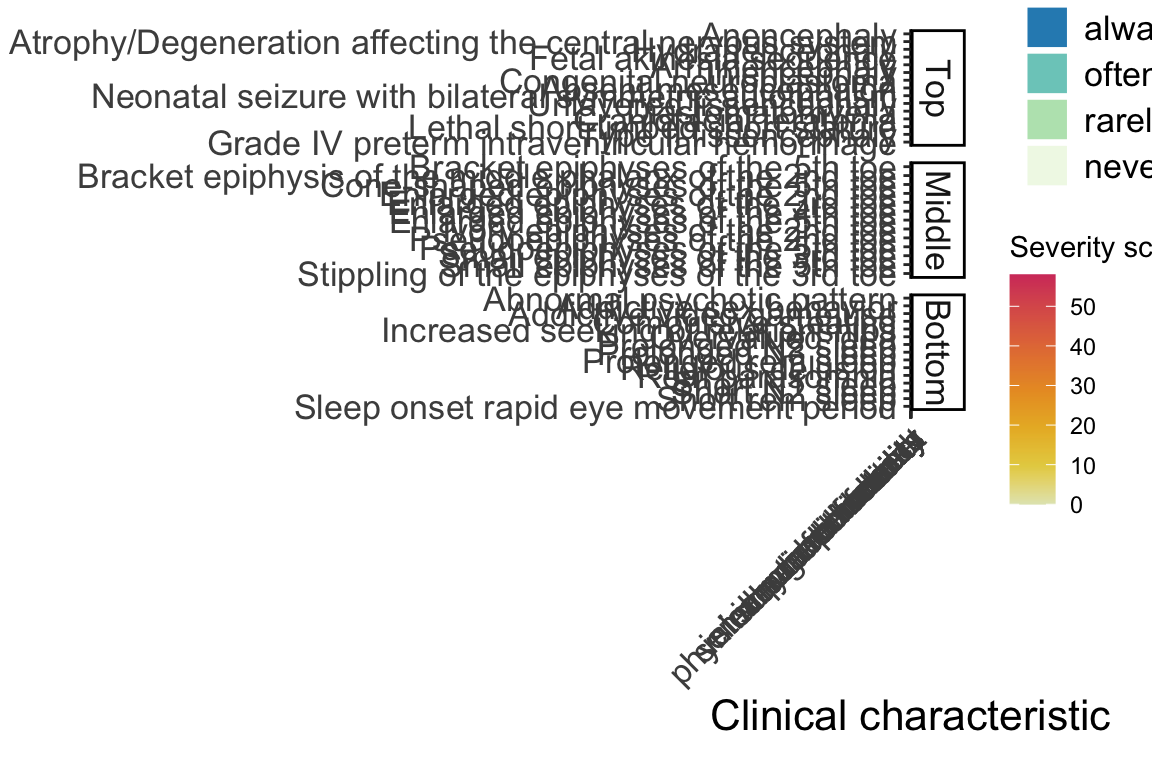

In [ ]:
p1 <- ggplot2::ggplot(data = dat_all,
                      ggplot2::aes(x=variable, y=hpo_name, fill=value)) +
  ggplot2::geom_tile(colour = "white", lwd = 0.5, linetype =1) +
  ggplot2::scale_y_discrete(limits=rev) +
  scale_fill_brewer(palette = "GnBu", direction = -1) +
  ggplot2::theme_classic() +
  ggplot2::theme(axis.text.x = ggplot2::element_text(angle = 45, hjust = 1),
                 legend.position = 'right',
                 text = element_text(size=16)) +
  labs(x = "Clinical characteristic",
       y = "HPO term",
       fill = "") +
  ggplot2::facet_grid(position ~ ., scales = "free_y")

p2 <- ggplot2::ggplot(data = dat_all,
                      ggplot2::aes(x="severity_score_gpt", y=hpo_name,
                                   fill=severity_score_gpt)) +
  ggplot2::geom_tile() +
  ggplot2::scale_y_discrete(limits=rev) +
  scale_fill_gradientn(colours = colorspace::heat_hcl(7), trans = "reverse") +
  ggplot2::labs(x=NULL, y=NULL, fill = "Severity score") +
  ggplot2::theme_void() +
  ggplot2::theme(axis.text.y = ggplot2::element_blank(),
                 axis.ticks.y = ggplot2::element_blank(),
                 legend.position = 'right') +
  guides(fill = guide_colorbar(reverse = TRUE))

p3 <- patchwork::wrap_plots(p1, p2, ncol = 2,
                            widths = c(1,.2),
                            guides = "collect")

print(p3)

## Discussion

Here, we present a novel approach leveraging the OpenAI GPT-4 model, to systematically annotate the severity of 17,000 phenotypic abnormalities within the HPO. Our findings highlight the potential of natural language processing technologies in significantly contributing to the automation and refinement of the curation process in genomics and rare disease research. Manual curation of ontologies has traditionally relied on expert input, a process that is both time-consuming and labor-intensive. By employing advanced AI capabilities, we have demonstrated the feasibility of automating this process, significantly enhancing efficiency without compromising accuracy. Our validation approach yielded a high true positive rate exceeding 73% across the phenotypes tested. Furthermore, our approach can be readily adapted and scaled to accommodate the growing volume of phenotypic data.

A key contribution of our study is the development of a severity scoring system that integrates both the nature of the phenotype outcome and the frequency of its occurrence. By quantifying the phenotypic severity this way, we highlight the most impactful conditions and provide a comprehensive framework for prioritising gene therapy trials and guiding clinical decision-making in rare diseases.

\*\* Brian to pick examples from severity scoring \*\*

Given its scalability it can be easily applied as more phenotypes are added to the HPO, but can also be extended to include different annotations and to be used with other ontologies. For instance, we could have also tried to use GPT-4 to annotate how prevalent a phenotype is in the human population, or what the cost to the health system is of a phenotype. Currently there are no systematic annotations of these on a phenotypic level. However, it’s unclear whether GPT-4 could currently be applied for such annotations, or whether they require much more extensive data collection.

Importantly, there are additional factors that need to be considered when trying to prioritise phenotypes for their suitability for gene therapy development. First, our scoring is in some sense subjective, for instance, one could ask is something that always causes death, always worse than something which causes a lifetime of other severe clinical characteristics. In terms of viability for a clinical trial, a phenotype which causes a lifetime of expensive burden on the medical system may be a better target than a phenotype which causes a quick death with little or no other clinical characteristics before. It would be worth exploring whether GPT-4 could estimate such costs. Another factor that affects the viability of developing a treatment for a therapy is how quickly a clinical trial can be run. For instance, measuring a high risk of respiratory failure over ten years would require a long trial. However, testing for total reversal of an existing severe phenotype would be much faster. As AI capabilities continue to advance, perhaps this is something GPT-4 and other models of the like could test for.

An additional annotation that we didn’t take into consideration here is that GPT-4 might be aware of whether there are existing treatments for these phenotypes. Therefore, some of the top-ranking severe phenotype we have identified may already have treatment options available. It would therefore be useful to know whether a phenotype, although highly severe, is currently treatable, and also whether there exist known clinical endpoints for clinical trial testing. GPT-4 does seem to take into account quality of care, i.e. the degree to which health services increase the likelihood of desired outcomes (World Health Organization). For example, many of the cancer phenotypes are justified as always or often causing death unless treated or caught early. On the other hand, some cancers are justified as rarely causing death if appropriate treatment is provided, which may not always be the case for individuals or populations with access to less advanced medical systems. In future efforts, we might want to ask GPT-4 more explicitly to distinguish between whether a phenotype would cause death without treatment, or with best available standard of care.

While our study demonstrates the feasibility and utility of AI-driven phenotypic annotation, several limitations must be acknowledged. The reliance on computational algorithms may introduce biases or inaccuracies inherent to the training data, necessitating ongoing validation and refinement of our approach. Additionally, our severity scoring system, while comprehensive, may not capture the full spectrum of phenotypic variability or account for complex gene-environment interactions. Future research should focus on further optimising AI-driven annotation methodologies, incorporating additional data modalities such as genomic and clinical data to enhance accuracy.

In conclusion, our study represents a significant step towards harnessing the power of AI to advance phenotypic annotation and severity assessment in rare diseases. This resource aims to provide researchers and clinicians with actionable insights that can inform rare disease research and improve the lives of individuals affected by rare diseases.

## Methods

### Annotating the HPO using OpenAI GPT-4

We employed the OpenAI GPT-4 model with Python to annotate 16,982 terms within the Human phenotype Ontology (HPO). Our annotation framework was developed based on previously defined criteria for classifying disease severity (Lazarin et al., 2014). We sought to evaluate the impact of phenotypes on factors including intellectual disability, death, impaired mobility, physical malformations, blindness, sensory impairments, immunodeficiency, cancer, reduced fertility, and congenital onset. Through prompt design we found that the performance of GPT-4 improved when we incorporated a scale associated with each effect and required a justification for each response. For each effect, we asked about the likelihood of its occurrence - whether it never, rarely, often, or always occurred.

### Calculating the true positive rate

A true positive rate was calculated as a measure of the accuracy of the GPT-4 annotations. This was achieved by identifying specific branches within the HPO that would contain phenotypes that would reliably indicate the occurrence of certain clinical characteristics, and using all descendants of this HPO branch as true positives. For example, all descendants of the terms Abnormal central motor function and abnormality of movement should always or often cause impaired mobility (Table 1).

| Clinical characteristics | True positive HPO branch                                                                                                                                                                                        |
|------------------------------------|------------------------------------|
| Intellectual disability  | Intellectual disability (HP:0001249)                                                                                                                                                                            |
| Impaired mobility.       | Abnormal central motor function (HP:0011442) and Abnormality of movement (HP:0100022)                                                                                                                           |
| Physical malformations   | Malformation (string search)                                                                                                                                                                                    |
| Blindness                | Blindness (HP:0000618)                                                                                                                                                                                          |
| Sensory impairments      | Abnormality of vision (HP:0000504), Abnormality of the sense of smell (HP:0004408), Abnormality of taste sensation (HP:0000223), Somatic sensory dysfunction (HP:0003474), and Hearing abnormality (HP:0000364) |
| Immunodeficiency         | Immunodeficiency (HP:0002721)                                                                                                                                                                                   |
| Cancer                   | Neoplasm (HP:0002664)                                                                                                                                                                                           |
| Reduced fertility        | Decreased fertility (HP:0000144)                                                                                                                                                                                |

### Quantifying phenotypic severity

The GPT-4 generated annotation occurrences were converted into a semi-quantitative scoring system, with ‘always’ corresponding to 3, ‘often’ to 2, ‘rarely’ to 1, and ‘never’ to 0. These scores were then weighted by a severity metric on a scale of 1-5, with 5 representing the highest severity, as determined by the provided annotations (Table 2). Subsequently, the weighted scores underwent normalisation to yield a final quantitative severity score ranging from 0-100, with 100 signifying the maximum severity score attainable.

Clinical characteristic \| Always (4) \| Often (3) \| Rarely (2) \| Never (0) \|  
Intellectual_disability (5) \| 20 \| 15 \| 10 \| 0 \|  
Impaired_mobility (5) \| 20 \| 15 \| 10 \| 0 \|  
Blindness (4) \| 16 \| 12 \| 8 \| 0 \|  
Congenital onset (4) \| 16 \| 12 \| 8 \| 0 \|  
Physical_malformations (3) \| 12 \| 9 \| 6 \| 0 \|  
Sensory_impairments (3) \| 12 \| 9 \| 6 \| 0 \|  
Immunodeficiency (3) \| 12 \| 9 \| 6 \| 0 \|  
Cancer (3) \| 12 \| 9 \| 6 \| 0 \|  
Reduced_fertility (1) \| 4 \| 3 \| 2 \| 0 \|

## Supplementary figures

Adding level-2 ancestor to each HPO ID.

Adding ancestor metadata.

Ancestor metadata already present. Use force_new=TRUE to overwrite.

Translating ontology terms to ids.

Keeping descendants of 1 term(s).

17,719 terms remain after filtering.

172,670 associations remain after filtering.

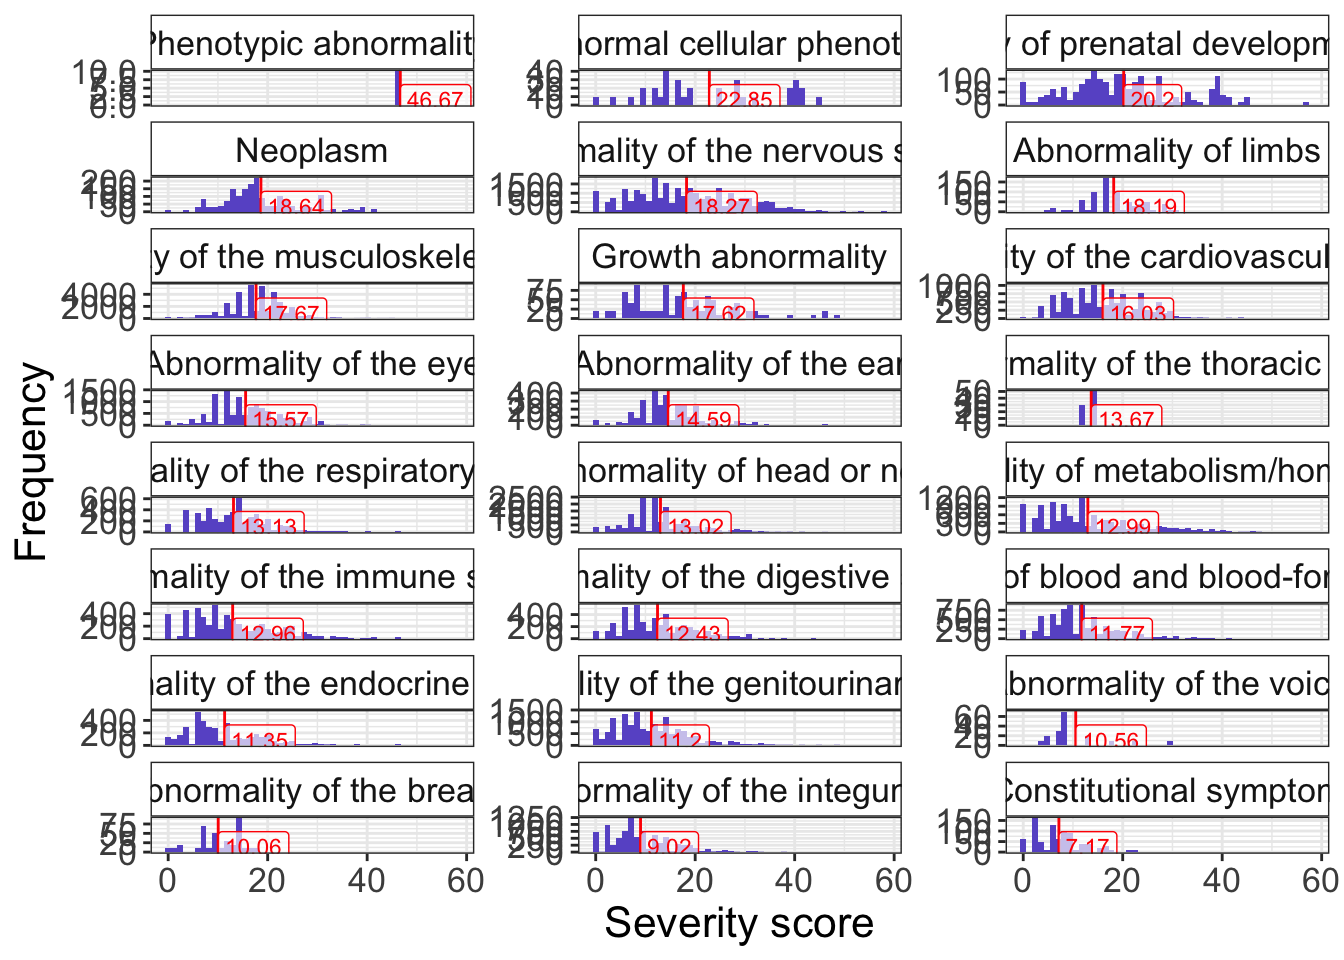

In [ ]:
dat2 <- HPOExplorer:::gpt_annot_melt(res_coded = res_coded)
dat2 <- add_ancestor(dat2,
                     keep_descendants = keep_descendants)

## References